In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("perceptron_toydata-truncated.txt",sep = "\t")

In [5]:
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [6]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [7]:
X_train[0][0]

0.77

In [8]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [9]:
## to show no of binary class it has

np.bincount(y_train)

array([10, 10], dtype=int64)

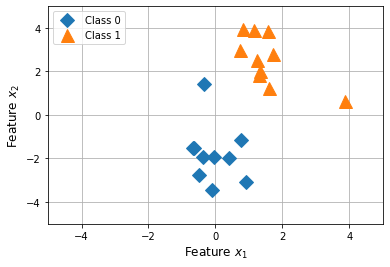

In [10]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [11]:
# !pip install torch

In [12]:
import torch
torch.randn(3,2)

tensor([[ 0.5058, -1.0133],
        [-1.5972, -0.6483],
        [ 0.6689, -0.7682]])

## Implementing perceptron

In [22]:
class perceptron:

    # initialization is done
    ## and I thing that you will also be doing your leetcode and striver coding in this PC only. That would be nice, come here at fucking 7.30 am, and tell the worl

    def __init__(self,num_features):
        self.num_features = num_features
        self.weights = [0.0 for i in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        
        x = torch.tensor(x,dtype = torch.float32)
        self.weights = torch.tensor(self.weights,dtype = torch.float32)
        # weighted_sum_z = torch.dot(x, self.weights) + self.bias
        # using the .matmul function
        weighted_sum_z = torch.matmul(x,self.weights) + self.bias

        predictions = torch.where(weighted_sum_z>0,1.0,0.0)

        return predictions

    def update(self,x,y_true,lr):
        y_pred = self.forward(x)
        error = y_true - y_pred

        for i,_ in enumerate(self.weights):
            self.weights[i]+= lr *error * x[i]

        return error



In [23]:
# training the model

def train(model,all_x, all_y, epochs):
    error_list = []
    for epoch in range(epochs):
        error_count = 0

        for x , y in zip(all_x,all_y):
            error = model.update(x,y,0.1)
            error_count+=abs(error)

        error_list.append(error_count)

        print(f"ephohs {epoch + 1}, training error {error_count}")

    plt.bar(np.arange(1,epochs+1),error_list)
    plt.show()

ephohs 1, training error 1.0
ephohs 2, training error 3.0
ephohs 3, training error 1.0
ephohs 4, training error 2.0
ephohs 5, training error 1.0
ephohs 6, training error 2.0
ephohs 7, training error 1.0
ephohs 8, training error 1.0
ephohs 9, training error 3.0
ephohs 10, training error 1.0
ephohs 11, training error 1.0
ephohs 12, training error 2.0
ephohs 13, training error 3.0
ephohs 14, training error 1.0
ephohs 15, training error 1.0


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


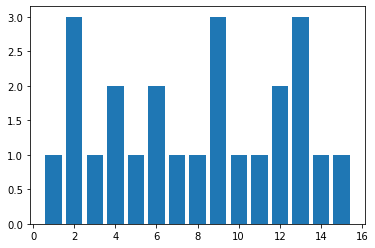

In [24]:
ppn = perceptron(num_features=2)

train(ppn,all_x = X_train,all_y = y_train, epochs = 15)

In [25]:
ephos = np.arange(1,100)

In [17]:
ephos

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])